In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
# Loading The DataSet
data = pd.read_csv('COFORGE.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,1318.000000,1323.000000,1306.800049,1319.099976,1240.621704,356884
1,2019-04-23,1315.099976,1318.000000,1300.550049,1303.650024,1226.090820,203428
2,2019-04-24,1301.050049,1314.750000,1298.800049,1309.650024,1231.733887,152965
3,2019-04-25,1313.000000,1313.000000,1296.550049,1301.349976,1223.927612,230304
4,2019-04-26,1302.000000,1321.000000,1296.000000,1314.000000,1235.825317,266749
...,...,...,...,...,...,...,...
1230,2024-04-12,5685.000000,5719.500000,5600.000000,5616.250000,5616.250000,323488
1231,2024-04-15,5515.000000,5585.250000,5373.899902,5396.200195,5396.200195,546918
1232,2024-04-16,5352.950195,5354.000000,5200.000000,5209.899902,5209.899902,591551
1233,2024-04-18,5228.000000,5311.000000,5175.000000,5206.899902,5206.899902,531498


<Axes: >

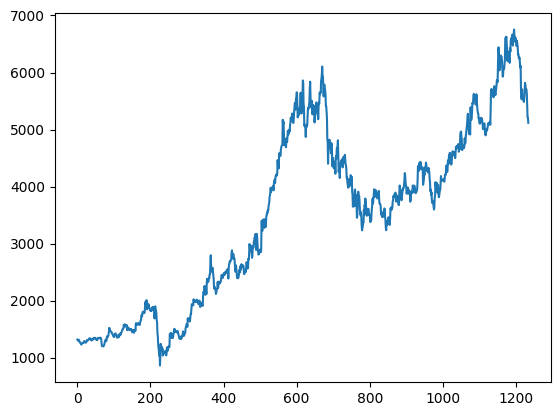

In [3]:
#to show data in graph
data['Close'].plot()

In [11]:
train_data = data.iloc[:int(.90*len(data)), :]
test_data = data.iloc[:int(.90*len(data)):, :]

In [12]:
#defineing the features and the target variable
features = ['Open', 'Volume']
target = 'Close'

In [13]:
#create and train the model
model = xgb.XGBRFRegressor() #cause we gonna be using regression here
model.fit(train_data[features], train_data[target])

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [14]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('MOdel Predictions: ')
print(predictions)

MOdel Predictions: 
[1439.1411 1447.1849 1438.2439 ... 5203.01   5136.7964 4843.5156]


In [15]:
#show the actual values
print('Actual Values: ')
print(test_data[target])

Actual Values: 
0       1319.099976
1       1303.650024
2       1309.650024
3       1301.349976
4       1314.000000
           ...     
1106    5138.750000
1107    5196.250000
1108    5154.649902
1109    5096.899902
1110    5006.649902
Name: Close, Length: 1111, dtype: float64


In [16]:
#Showing the Model's Accuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy: ')
print(accuracy*100)

Accuracy: 
98.84991228660051


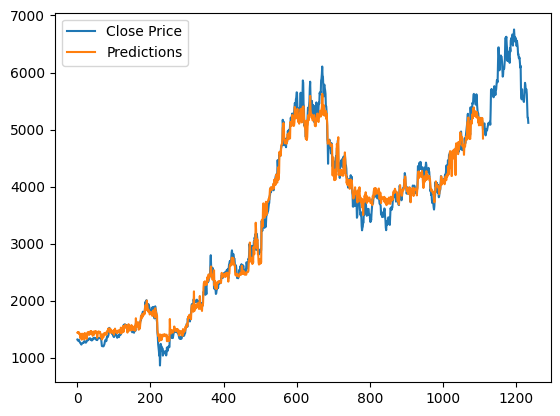

In [17]:
#plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()